In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import astropy.units as u
import math

#%matplotlib notebook

## 2024_197_09_58_39 results

In [12]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_197_09_58_39/decoded/csv'

In [13]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [14]:
num_positions = 5
imgs_per = 5
num_images = 55


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)



dark 0
dark 1
dark 2
dark 3
dark 4
light 5
light 6
light 7
light 8
light 9
dark 10
dark 11
dark 12
dark 13
dark 14
light 15
light 16
light 17
light 18
light 19
dark 20
dark 21
dark 22
dark 23
dark 24
light 25
light 26
light 27
light 28
light 29
dark 30
dark 31
dark 32
dark 33
dark 34
light 35
light 36
light 37
light 38
light 39
dark 40
dark 41
dark 42
dark 43
dark 44
light 45
light 46
light 47
light 48
light 49
dark 50
dark 51
dark 52
dark 53
dark 54
(30, 1000, 752)


In [15]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

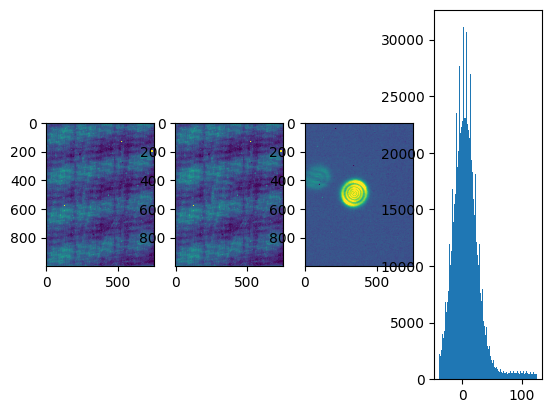

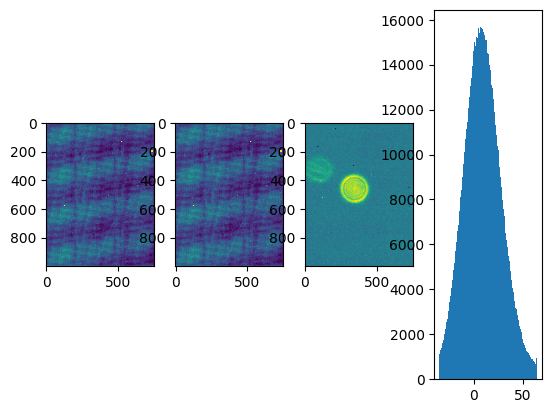

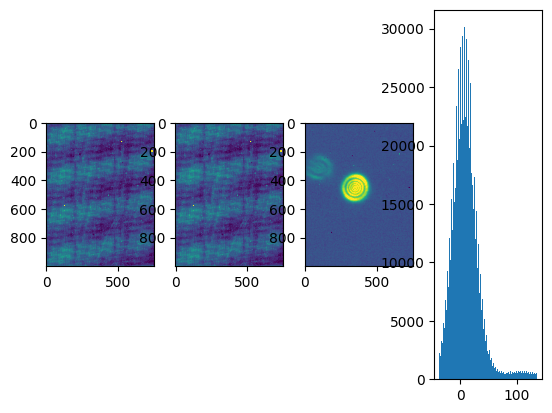

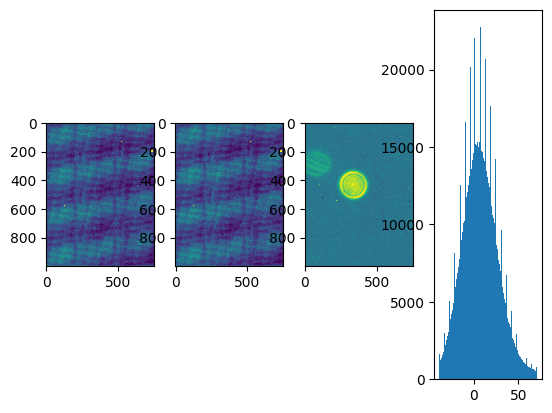

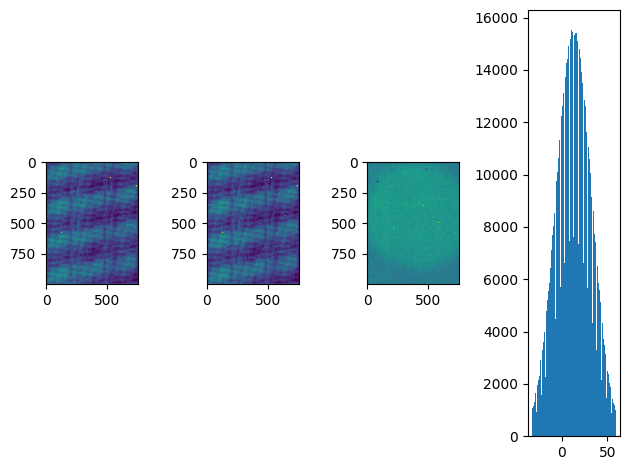

In [16]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

### Looking at the first red laser image

area of subsection in micrometers squared: 1712256.0 um2
Radius of laser footprint in micrometers: 637.0 um
Area of laser footprint in micrometers squared: 1274760.9094544768 um2
power per area: 7.844608291510457e-07 mW / um2


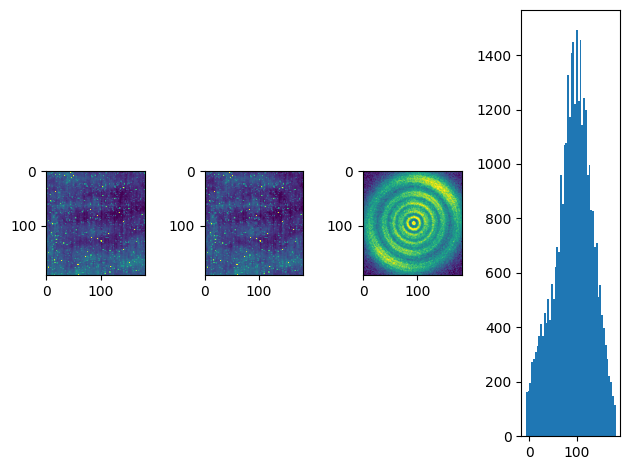

In [14]:
i = 0

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 398 #top limit - slicing
b = 590 #bottom limit -slicing

l = 250 #left limit - slicing
r = 432 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = (math.pi * ((radius_footprint) **2))
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_area = ((1 * u.mW) / (laser_footprint_area))
print(f'power per area: {power_per_area}')

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [18]:
#sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

#sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
#intensity_ratio = solar_constant / sun_sim_intensity
#print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (625* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.mW)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')

#suppression using total_power from np.sum
suppression_total = (total_power_watts) / (1*u.mW) 
print(f'Suppression using total power: {suppression_total}')

suppression_area_circle = (power_per_area) / (1*u.mW)
print(f'Suppression using power per area from area of the laser circle: {suppression_area_circle}')

95.5 DN
1.984 eV / ph
0.9784109589041097 DN / ph
4.880362343189964 ph / s
sum of all dark subtract: 3244662.0 DN
Total power from laser footprint (using sum) is 328972.675 eV / s or 5.270723331094759e-11 mW
Suppression using total power: 5.270723331094759e-11
Suppression using power per area from area of the laser circle: 7.844608291510457e-07 1 / um2


In [ ]:
#This is probably wront, fix suppression using area of circle
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

#idk
power_on_detector = leak_rate / laser_footprint_area

#simulating the sun as a replacement to the laser
incident_signal = power_per_area.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

In [35]:


#simulating the sun as a replacement to the laser
incident_signal = power_per_area.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

120924773085.46274 ph / s
4.035866447101623e-11


sum of all dark subtract for reflection: 805372.5 DN
sum of all dark subtract for primary footprint: 3244662.0 DN
ratio between reflection and primary footprint: 0.24821460602059628


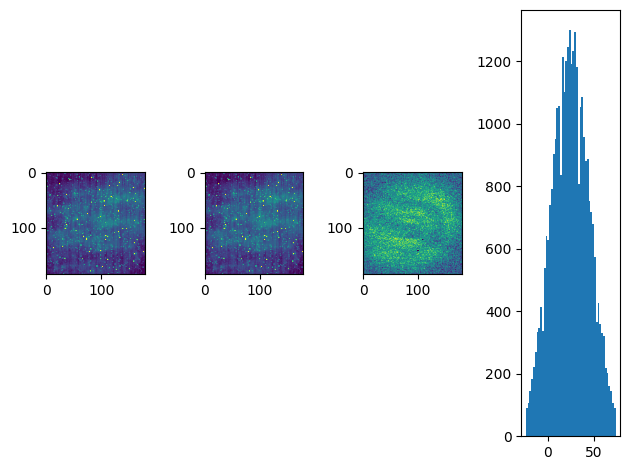

In [38]:
#Looking at reflection
i = 0

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 290 #top limit - slicing
b = 475 #bottom limit -slicing

l = 0 #left limit - slicing
r = 180 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract_reflection = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract_reflection, 1)
vmax = np.percentile(dark_subtract_reflection, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract_reflection, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract_reflection.flatten(), **hist_kwargs)
fig.tight_layout()

sum_reflection = np.sum(dark_subtract_reflection) * u.DN
print(f'sum of all dark subtract for reflection: {sum_reflection}')
print(f'sum of all dark subtract for primary footprint: {sum}')

ratio = (sum_reflection)/(sum)
print(f'ratio between reflection and primary footprint: {ratio}')


### Looking at the first blue laser image

area of subsection in micrometers squared: 1853376.0 um2
Radius of laser footprint in micrometers: 672.0 um
Area of laser footprint in micrometers squared: 1418692.976878693 um2
power per area: 7.048741456380002e-07 mW / um2


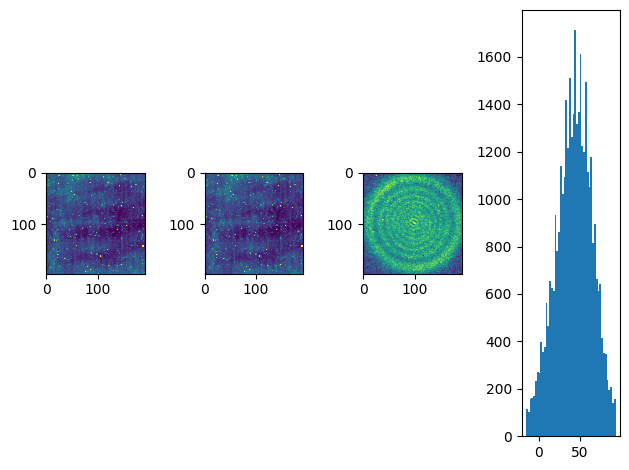

In [19]:
i = 1

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 365 #top limit - slicing
b = 562 #bottom limit -slicing

l = 246 #left limit - slicing
r = 438 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = (math.pi * ((radius_footprint) **2))
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_area = ((1 * u.mW) / (laser_footprint_area))
print(f'power per area: {power_per_area}')

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [20]:
#sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

#sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
#intensity_ratio = solar_constant / sun_sim_intensity
#print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (452* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.mW)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')

#suppression using total_power from np.sum
suppression_total = (total_power_watts) / (1*u.mW) 
print(f'Suppression using total power: {suppression_total}')

suppression_area_circle = (power_per_area) / (1*u.mW)
print(f'Suppression using power per area from area of the laser circle: {suppression_area_circle}')

44.0 DN
2.743362831858407 eV / ph
1.3528912595466116 DN / ph
1.6261469534050181 ph / s
sum of all dark subtract: 1615360.5 DN
Total power from laser footprint (using sum) is 163779.60625 eV / s or 2.6240385825947035e-11 mW
Suppression using total power: 2.6240385825947035e-11
Suppression using power per area from area of the laser circle: 7.048741456380002e-07 1 / um2


In [21]:
#simulating the sun as a replacement to the laser
incident_signal = power_per_area.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

78580360547.94516 ph / s
2.069406327568118e-11


sum of all dark subtract for reflection: 623067.0 DN
sum of all dark subtract for primary footprint: 1615360.5 DN
ratio between reflection and primary footprint: 0.38571390101466513


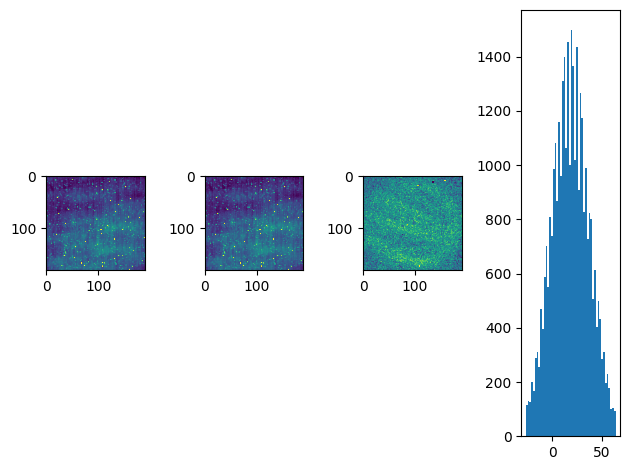

In [23]:
#Looking at reflection
i = 1

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 238#top limit - slicing
b = 420 #bottom limit -slicing

l = 0 #left limit - slicing
r = 190 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract_reflection = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract_reflection, 1)
vmax = np.percentile(dark_subtract_reflection, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract_reflection, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract_reflection.flatten(), **hist_kwargs)
fig.tight_layout()



sum_reflection = np.sum(dark_subtract_reflection) * u.DN
print(f'sum of all dark subtract for reflection: {sum_reflection}')
print(f'sum of all dark subtract for primary footprint: {sum}')

ratio = (sum_reflection)/(sum)
print(f'ratio between reflection and primary footprint: {ratio}')

### Looking at the second red laser image

area of subsection in micrometers squared: 1749888.0 um2
Radius of laser footprint in micrometers: 651.0 um
Area of laser footprint in micrometers squared: 1331410.108184008 um2
power per area: 7.510833768296693e-07 mW / um2


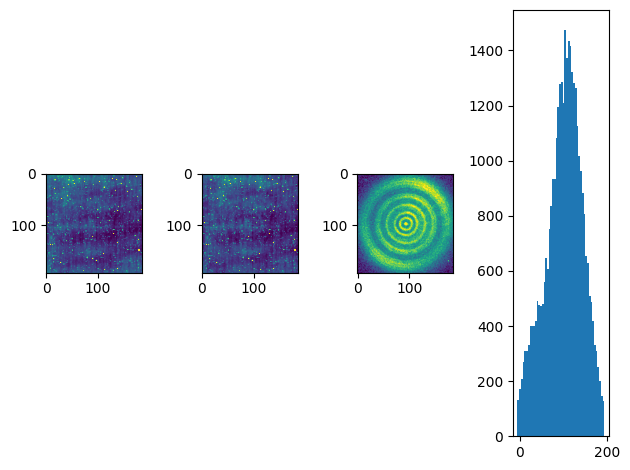

In [24]:
i = 2

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 360 #top limit - slicing
b = 552 #bottom limit -slicing

l = 254 #left limit - slicing
r = 440 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = (math.pi * ((radius_footprint) **2))
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_area = ((1 * u.mW) / (laser_footprint_area))
print(f'power per area: {power_per_area}')

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [25]:
#sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

#sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
#intensity_ratio = solar_constant / sun_sim_intensity
#print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN or 100
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (625* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.mW)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')

#suppression using total_power from np.sum
suppression_total = (total_power_watts) / (1*u.mW) 
print(f'Suppression using total power: {suppression_total}')

suppression_area_circle = (power_per_area) / (1*u.mW)
print(f'Suppression using power per area from area of the laser circle: {suppression_area_circle}')

105.0 DN
1.984 eV / ph
0.9784109589041097 DN / ph
5.365843413978494 ph / s
sum of all dark subtract: 3611008.0 DN
Total power from laser footprint (using sum) is 366116.0888888889 eV / s or 5.865826429492448e-11 mW
Suppression using total power: 5.865826429492448e-11
Suppression using power per area from area of the laser circle: 7.510833768296693e-07 1 / um2


In [26]:
#simulating the sun as a replacement to the laser
incident_signal = power_per_area.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

115779633011.99179 ph / s
4.634531371698795e-11


sum of all dark subtract for reflection: 912408.0 DN
sum of all dark subtract for primary footprint: 3611008.0 DN
ratio between reflection and primary footprint: 0.25267404558505546


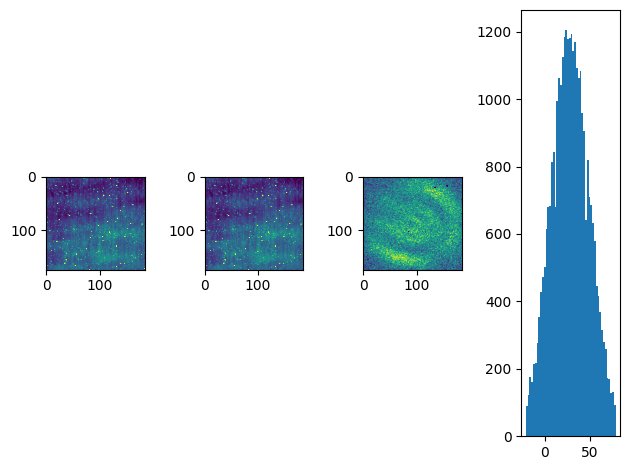

In [27]:
#Looking at reflection
i = 2

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 230 #top limit - slicing
b = 405 #bottom limit -slicing

l = 0 #left limit - slicing
r = 185 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract_reflection = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract_reflection, 1)
vmax = np.percentile(dark_subtract_reflection, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract_reflection, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract_reflection.flatten(), **hist_kwargs)
fig.tight_layout()



sum_reflection = np.sum(dark_subtract_reflection) * u.DN
print(f'sum of all dark subtract for reflection: {sum_reflection}')
print(f'sum of all dark subtract for primary footprint: {sum}')

ratio = (sum_reflection)/(sum)
print(f'ratio between reflection and primary footprint: {ratio}')

### Looking at the second blue laser image

area of subsection in micrometers squared: 1806287.0 um2
Radius of laser footprint in micrometers: 668.5 um
Area of laser footprint in micrometers squared: 1403953.4095462132 um2
power per area: 7.122743484224457e-07 mW / um2


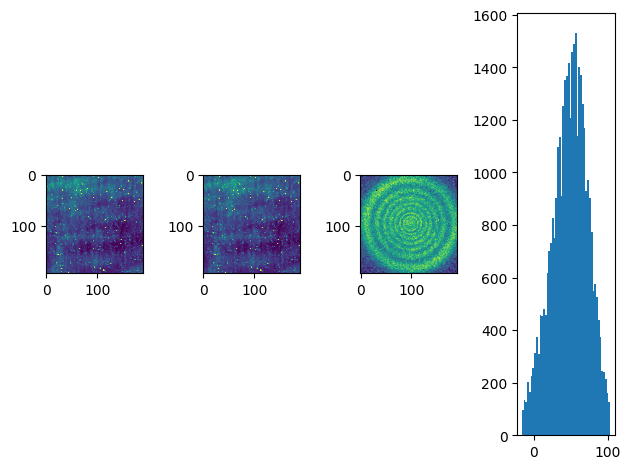

In [28]:
i = 3

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 340 #top limit - slicing
b = 533 #bottom limit -slicing

l = 239 #left limit - slicing
r = 430 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = (math.pi * ((radius_footprint) **2))
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_area = ((1 * u.mW) / (laser_footprint_area))
print(f'power per area: {power_per_area}')

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [29]:
#sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

#sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
#intensity_ratio = solar_constant / sun_sim_intensity
#print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN or 50
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (452* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.mW)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')

#suppression using total_power from np.sum
suppression_total = (total_power_watts) / (1*u.mW) 
print(f'Suppression using total power: {suppression_total}')

suppression_area_circle = (power_per_area) / (1*u.mW)
print(f'Suppression using power per area from area of the laser circle: {suppression_area_circle}')

50.5 DN
2.743362831858407 eV / ph
1.3528912595466116 DN / ph
1.8663732078853048 ph / s
sum of all dark subtract: 1793036.5 DN
Total power from laser footprint (using sum) is 181793.97847222222 eV / s or 2.9126606451009346e-11 mW
Suppression using total power: 2.9126606451009346e-11
Suppression using power per area from area of the laser circle: 7.122743484224457e-07 1 / um2


In [30]:
print(power_per_area)
print(pixel_size)

7.122743484224457e-07 mW / um2
7.0 micron


In [31]:
#simulating the sun as a replacement to the laser
incident_signal = power_per_area.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

79405345556.30193 ph / s
2.3504377379252927e-11


sum of all dark subtract for reflection: 640769.5 DN
sum of all dark subtract for primary footprint: 1793036.5 DN
ratio between reflection and primary footprint: 0.3573655639469693


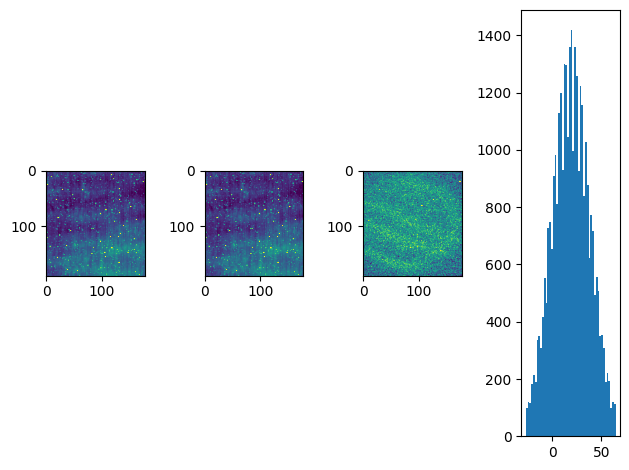

In [32]:
#Looking at reflection
i = 3

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 195 #top limit - slicing
b = 385 #bottom limit -slicing

l = 0 #left limit - slicing
r = 178 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract_reflection = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract_reflection, 1)
vmax = np.percentile(dark_subtract_reflection, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract_reflection, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract_reflection.flatten(), **hist_kwargs)
fig.tight_layout()



sum_reflection = np.sum(dark_subtract_reflection) * u.DN
print(f'sum of all dark subtract for reflection: {sum_reflection}')
print(f'sum of all dark subtract for primary footprint: {sum}')

ratio = (sum_reflection)/(sum)
print(f'ratio between reflection and primary footprint: {ratio}')

### Looking at the solar simulator image - FINISH UP THIS ONE - power per area using .95mm outer diameter of photodiode and total power per area of selected subsection. Use to compare


area of subsection in micrometers squared: 12250000.0 um2


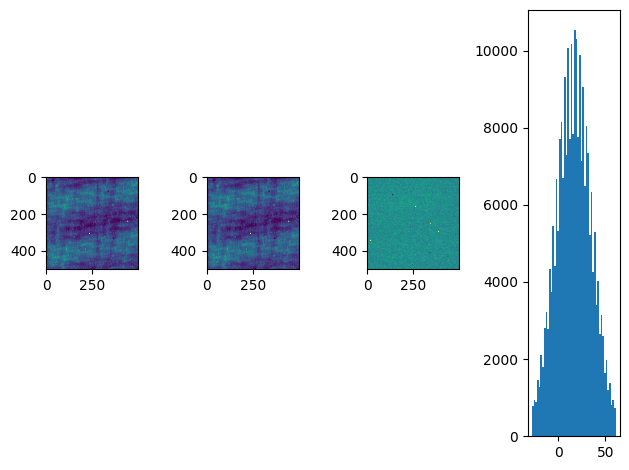

In [41]:
i = 4

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 200 #top limit - slicing
b = 700 #bottom limit -slicing

l = 200 #left limit - slicing
r = 700 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

# radius_footprint = ((r - l) / 2) * (7 *u.um)
# print(f'Radius of laser footprint in micrometers: {radius_footprint}')

# laser_footprint_area = (math.pi * ((radius_footprint) **2))
# print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

# power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
# print(f'power per pixel: {power_per_pixel}')

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [40]:
sun_sim_intensity = 182 * u.microwatt / (9700 * u.um) ** 2  #active aperture of thorlabs photodiode in micrometers2
print(f'power per area of incident solar sim light on photodiode: {sun_sim_intensity}')
solar_constant = 1.361 * u.kilowatt / u.m ** 2

sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.uW)
total_power_per_area = (total_power_watts) / (area_subsection)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')
print(f'Power per area on the detector: {total_power_per_area}')

suppression_using_power_per_area = (total_power_per_area) / (sun_sim_intensity)
print(f'Suppression (power per area on detector/ power per area incident on aperture): {suppression_using_power_per_area}')

#sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
#intensity_ratio = solar_constant / sun_sim_intensity
#print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (535* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

print(sun_sim_intensity.to(u.mW / (u.um**2)))

# power_per_pixel = sun_sim_intensity * ((7* u.micron)**2)
# print(power_per_pixel.to(u.Watt))

#leak_rate * intensity_ratio

power per area of incident solar sim light on photodiode: 1.9343182059730047e-06 uW / um2
sum of all dark subtract: 4048876.0 DN
Total power from laser footprint (using sum) is 410511.0388888889 eV / s or 6.577111945068431e-08 uW
Power per area on the detector: 5.369070975566066e-15 uW / um2
Suppression (power per area on detector/ power per area incident on aperture): 2.7756916928077536e-09
16.0 DN
2.317757009345794 eV / ph
1.1430034566636793 DN / ph
0.699910394265233 ph / s
1.934318205973005e-09 mW / um2


In [18]:
#simulating the sun as a replacement to the laser
incident_signal = sun_sim_intensity.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

255238217.2733723 ph / s
2.827878214307374e-09


## 2024_178_16_58_07 results

In [2]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_178_16_58_07/decoded/csv'

In [3]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [4]:
num_positions = 1
imgs_per = 5
num_images = 15


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)



dark 0
dark 1
dark 2
dark 3
dark 4
light 5
light 6
light 7
light 8
light 9
dark 10
dark 11
dark 12
dark 13
dark 14
(10, 250, 188)


In [5]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

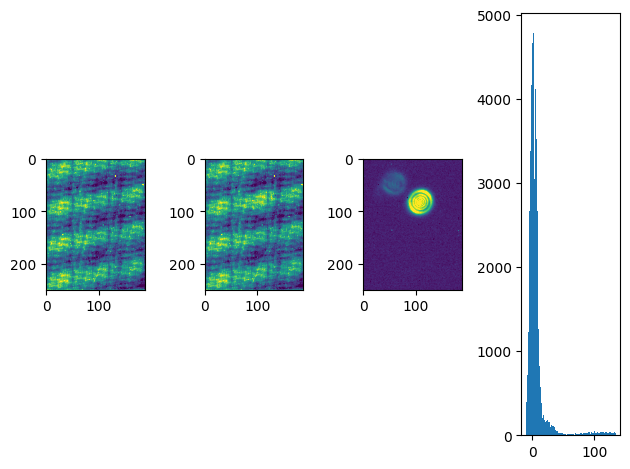

In [6]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

area of subsection in micrometers squared: 110446.0 um2
Radius of laser footprint in micrometers: 161.0 um
Area of laser footprint in micrometers squared: 81433.22317370103 um2
power per pixel: 1.2280000238562966e-05 mW / um2


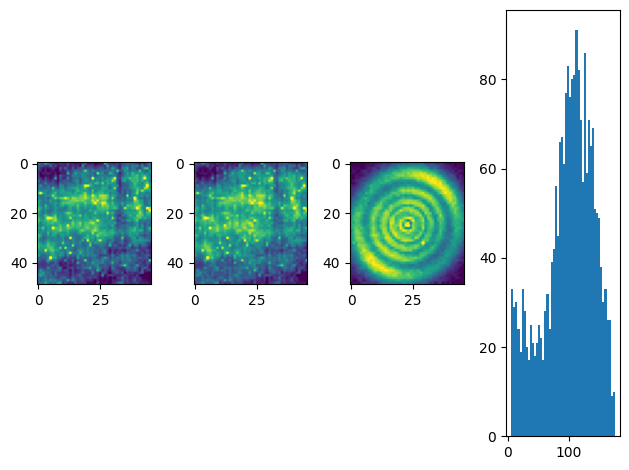

In [7]:
#select your image of focus (0 = first image, 1 = second image, etc)
i = 0

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 58 #top limit - slicing
b = 107 #bottom limit -slicing

l = 86 #left limit - slicing
r = 132 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = (math.pi * ((radius_footprint) **2))
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
print(f'power per pixel: {power_per_pixel}')

dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [9]:
#sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

#sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
#intensity_ratio = solar_constant / sun_sim_intensity
#print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (635* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

#leak_rate * intensity_ratio



sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.mW)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')

#suppression using total_power from np.sum
suppression_total = (total_power_watts) / (1*u.mW) 
print(f'Suppression using total power: {suppression_total}')

# suppression_area_circle = (power_per_area) / (1*u.mW)
# print(f'Suppression using power per area from area of the laser circle: {suppression_area_circle}')

104.5 DN
1.952755905511811 eV / ph
0.9630029123071945 DN / ph
5.425736447132616 ph / s
sum of all dark subtract: 223598.5 DN
Total power from laser footprint (using sum) is 22670.403472222224 eV / s or 3.6321990726546914e-12 mW
Suppression using total power: 3.6321990726546914e-12


In [10]:
print(power_per_pixel)
print(pixel_size)

1.2280000238562966e-05 mW / um2
7.0 micron


In [11]:
#simulating the sun as a replacement to the laser
incident_signal = power_per_pixel.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

1923251596702.171 ph / s
2.8211267087656186e-12


In [57]:
#working out the math on some numbers from Tom Woods
incident_signal * intensity_ratio * np.pi*(22*u.micron)**2/pixel_size**2


<Quantity 6.61446931e+12 ph / s>

## 2024_178_16_50_45 results

In [11]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_178_16_50_45/decoded/csv'

In [12]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [13]:
num_positions = 1
imgs_per = 1
num_images = 3


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)

dark 0
light 1
dark 2
(2, 250, 188)


In [14]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

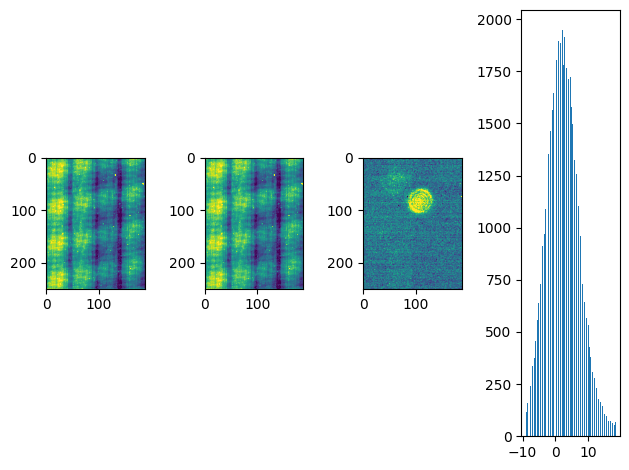

In [15]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

Area of subsection in micrometers squared: 105938.0 um2
Radius of laser footprint in micrometers: 161.0 um
Area of laser footprint in micrometers squared: 81433.22317370103 um2
Power per pixel: 1.2280000238562966e-05 mW / um2


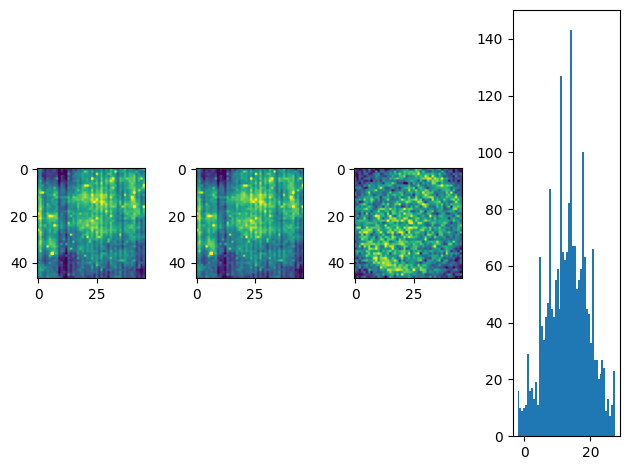

In [16]:
#select your image of focus (0 = first image, 1 = second image, etc)
i = 0

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 60 #top limit - slicing
b = 107 #bottom limit -slicing

l = 85 #left limit - slicing
r = 131 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'Area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = math.pi * ((radius_footprint) **2)
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
print(f'Power per pixel: {power_per_pixel}')


dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [17]:
sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
intensity_ratio = solar_constant / sun_sim_intensity
print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = 12 * u.DN
print(light_leak)

#Input exposure time
exposure_time = 5 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (635* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

#leak_rate * intensity_ratio


sum = np.sum(dark_subtract) * u.DN
print(f'sum of all dark subtract: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.mW)
print(f'Total power from laser footprint (using sum) is {total_power} or {total_power_watts}')

#suppression using total_power from np.sum
suppression_total = (total_power_watts) / (1*u.mW) 
print(f'Suppression using total power: {suppression_total}')

753.2734705882352
12.0 DN
1.952755905511811 eV / ph
0.9630029123071945 DN / ph
2.492204301075269 ph / s
sum of all dark subtract: 28431.0 DN
Total power from laser footprint (using sum) is 11530.349999999999 eV / s or 1.8473657351841895e-12 mW
Suppression using total power: 1.8473657351841895e-12


In [88]:
#simulating the sun as a replacement to the laser
incident_signal = sun_sim_intensity.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

282971814.26168776 ph / s
8.807252791511307e-09


In [89]:
#working out the math on some numbers from Tom Woods
incident_signal * intensity_ratio * np.pi*(22*u.micron)**2/pixel_size**2

<Quantity 6.61446931e+12 ph / s>

## 2024_173_14_31_38 results (Using my own parameters) - has updates solar sim suppression

In [25]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_173_14_31_38/decoded/csv'

In [26]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [27]:
num_positions = 5
imgs_per = 10
num_images = 110


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)

dark 0
dark 1
dark 2
dark 3
dark 4
dark 5
dark 6
dark 7
dark 8
dark 9
light 10
light 11
light 12
light 13
light 14
light 15
light 16
light 17
light 18
light 19
dark 20
dark 21
dark 22
dark 23
dark 24
dark 25
dark 26
dark 27
dark 28
dark 29
light 30
light 31
light 32
light 33
light 34
light 35
light 36
light 37
light 38
light 39
dark 40
dark 41
dark 42
dark 43
dark 44
dark 45
dark 46
dark 47
dark 48
dark 49
light 50
light 51
light 52
light 53
light 54
light 55
light 56
light 57
light 58
light 59
dark 60
dark 61
dark 62
dark 63
dark 64
dark 65
dark 66
dark 67
dark 68
dark 69
light 70
light 71
light 72
light 73
light 74
light 75
light 76
light 77
light 78
light 79
dark 80
dark 81
dark 82
dark 83
dark 84
dark 85
dark 86
dark 87
dark 88
dark 89
light 90
light 91
light 92
light 93
light 94
light 95
light 96
light 97
light 98
light 99
dark 100
dark 101
dark 102
dark 103
dark 104
dark 105
dark 106
dark 107
dark 108
dark 109
(60, 1000, 752)


In [28]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

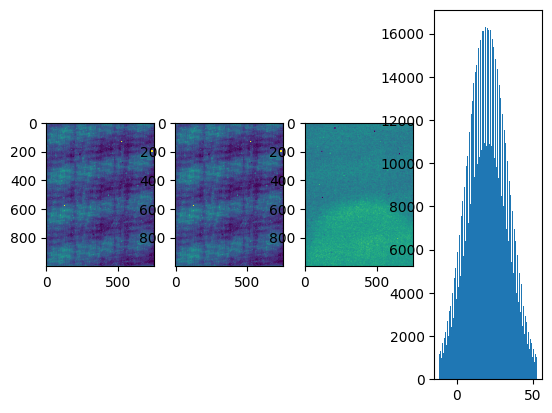

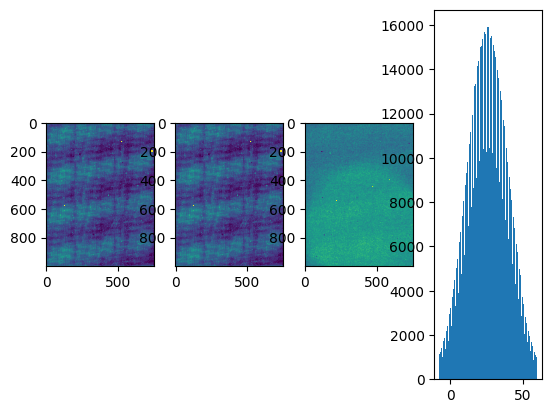

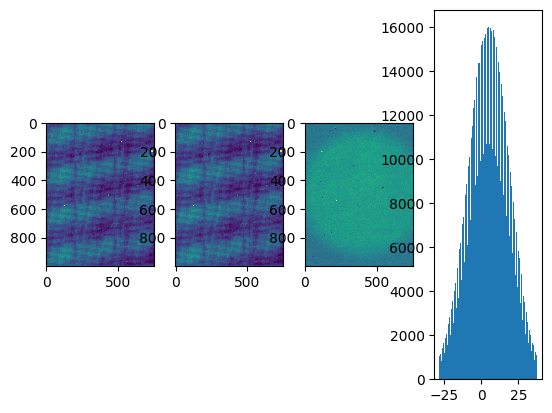

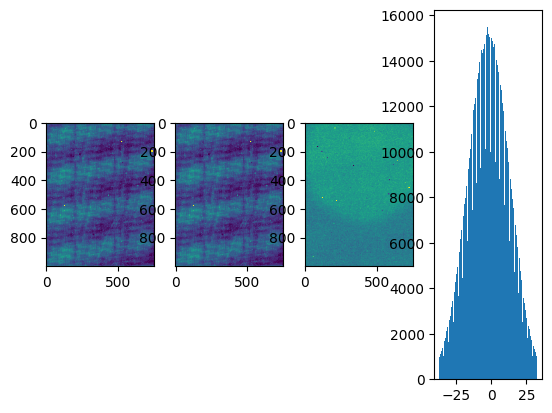

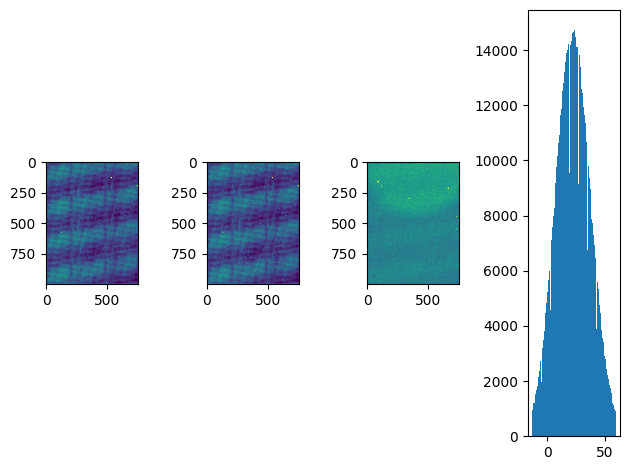

In [29]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

area of subsection in micrometers squared: 490000.0 um2


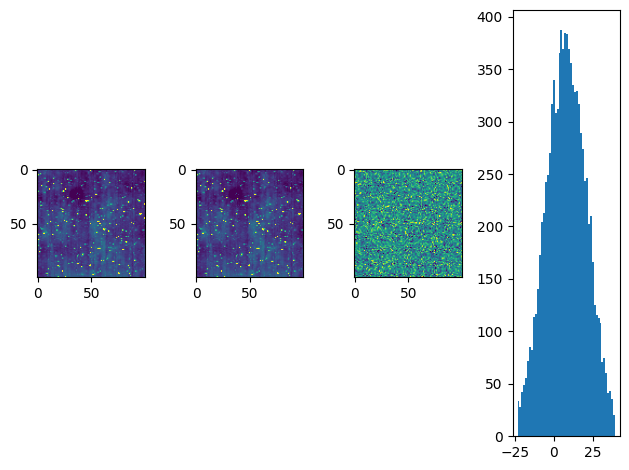

In [45]:
#select your image of focus (0 = first image, 1 = second image, etc)
i = 2



#This slices your images to focus in on certain areas in the plots - 40, 900 and 0, 750 for circle slicing

t = 200 #top limit - slicing
b = 300 #bottom limit -slicing

l = 200 #left limit - slicing
r = 300 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))



area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of sliced subsection in micrometers squared: {area_subsection}')



#Use these if you want to analyze the power within the circular area of the simulator footprint

# radius_footprint = ((r - l) / 2) * (7 *u.um)
# print(f'Radius of laser footprint in micrometers: {radius_footprint}')
# laser_footprint_area = math.pi * ((radius_footprint) **2)
# print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')
# power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
# print(f'power per pixel: {power_per_pixel}')


dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [53]:
sun_sim_intensity = 170 * u.microwatt / (9700 * u.um) ** 2  #active aperture of thorlabs photodiode in micrometers2
solar_constant = 1.361 * u.kilowatt / u.m ** 2
pixel_size = 7 * u.micron
band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = np.median(dark_subtract) * u.DN
print(f'average DN light leak: {light_leak}')



#Input exposure time
exposure_time = 20 * u.s


#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (535* u.nm) / u.photon
print(f'Energy per photon of incident light: {energy_photon}')

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(f'DN per photon: {dn_photon}')

leak_rate = light_leak / exposure_time / dn_photon
print(f'Leak rate: {leak_rate}')


#Input incident power of solar simulator here
sun_sim_intensity = 170 * u.microwatt / (9700 * u.um) ** 2  #active aperture of thorlabs photodiode in micrometers2
solar_constant = 1.361 * u.kilowatt / u.m ** 2

sum = np.sum(dark_subtract) * u.DN
print(f'DN sum of all dark subtract in the sliced subsection above: {sum}')

#conversion from total DN to measured power
total_power = ((sum) * (band_gap)) / ((exposure_time) * (gain))
total_power_watts = total_power.to(u.uW)
total_power_per_area = (total_power_watts) / (area_subsection)
print(f'Total power from solar simulator on the detector within sliced subsection is {total_power} or {total_power_watts}')

sun_sim_intensity = 170 * u.microwatt / (9700 * u.um) ** 2  #active aperture of thorlabs photodiode in micrometers2
print(f'Power per area of incident solar sim light on photodiode/aperture: {sun_sim_intensity}')
print(f'Power per area on the detector: {total_power_per_area}')

suppression_using_power_per_area = (total_power_per_area) / (sun_sim_intensity)
print(f'Suppression (power per area on detector/ power per area incident on aperture): {suppression_using_power_per_area}')

# sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
# intensity_ratio = solar_constant / sun_sim_intensity
# print(intensity_ratio)

average DN light leak: 8.0 DN
Energy per photon of incident light: 2.317757009345794 eV / ph
DN per photon: 1.1430034566636793 DN / ph
Leak rate: 0.3499551971326165 ph / s
DN sum of all dark subtract in the sliced subsection above: 80479.75 DN
Total power from solar simulator on the detector within sliced subsection is 8159.752430555554 eV / s or 1.3073364683460817e-09 uW
Power per area of incident solar sim light on photodiode/aperture: 1.8067807418429163e-06 uW / um2
Power per area on the detector: 2.6680336088695543e-15 uW / um2
Suppression (power per area on detector/ power per area incident on aperture): 1.4766781309325668e-09


In [54]:
#simulating the sun as a replacement to the laser
incident_signal = sun_sim_intensity.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

238409323.82677633 ph / s
1.4678754652518846e-09


## 2024_178_16_32_25 results

In [ ]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_178_16_32_25/decoded/csv'

In [ ]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [ ]:
num_positions = 1
imgs_per = 1
num_images = 3


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)

dark 0
light 1
dark 2
(2, 250, 188)


In [ ]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

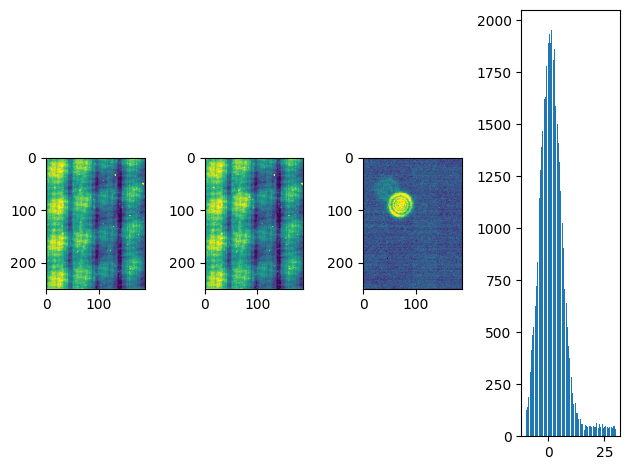

In [ ]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

area of subsection in micrometers squared: 115150.0 um2
Radius of laser footprint in micrometers: 164.5 um
Area of laser footprint in micrometers squared: 85012.2826043032 um2
power per pixel: 1.1763006113535192e-05 mW / um2


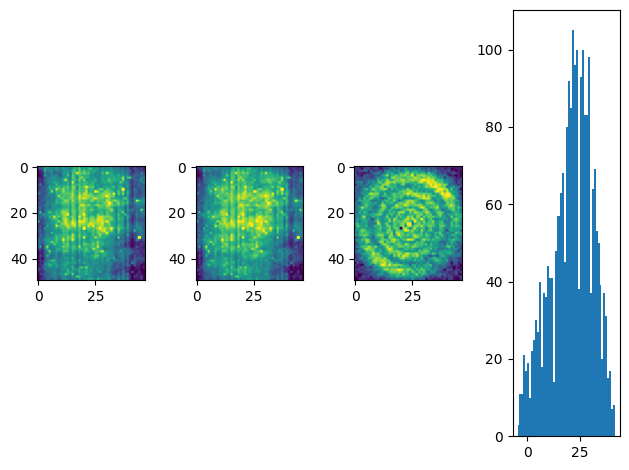

In [ ]:
#select your image of focus (0 = first image, 1 = second image, etc)
i = 0

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 65 #top limit - slicing
b = 115 #bottom limit -slicing

l = 47 #left limit - slicing
r = 94 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = math.pi * ((radius_footprint) **2)
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
print(f'power per pixel: {power_per_pixel}')


dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [ ]:
sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
intensity_ratio = solar_constant / sun_sim_intensity
print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = 24 * u.DN
print(light_leak)

#Input exposure time
exposure_time = 5 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (635* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

leak_rate * intensity_ratio

753.2734705882352
24.0 DN
1.952755905511811 eV / ph
0.9630029123071945 DN / ph
4.984408602150538 ph / s


<Quantity 3754.62276657 ph / s>

In [ ]:
#simulating the sun as a replacement to the laser
incident_signal = sun_sim_intensity.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

282971814.26168776 ph / s
1.7614505583022615e-08


In [ ]:
#working out the math on some numbers from Tom Woods
incident_signal * intensity_ratio * np.pi*(22*u.micron)**2/pixel_size**2

<Quantity 6.61446931e+12 ph / s>

## 2024_173_14_31_38 results (recreating Jake's results with his parameters)

In [23]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_173_14_31_38/decoded/csv'

In [24]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [25]:
num_positions = 5
imgs_per = 10
num_images = 110


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)

dark 0
dark 1
dark 2
dark 3
dark 4
dark 5
dark 6
dark 7
dark 8
dark 9
light 10
light 11
light 12
light 13
light 14
light 15
light 16
light 17
light 18
light 19
dark 20
dark 21
dark 22
dark 23
dark 24
dark 25
dark 26
dark 27
dark 28
dark 29
light 30
light 31
light 32
light 33
light 34
light 35
light 36
light 37
light 38
light 39
dark 40
dark 41
dark 42
dark 43
dark 44
dark 45
dark 46
dark 47
dark 48
dark 49
light 50
light 51
light 52
light 53
light 54
light 55
light 56
light 57
light 58
light 59
dark 60
dark 61
dark 62
dark 63
dark 64
dark 65
dark 66
dark 67
dark 68
dark 69
light 70
light 71
light 72
light 73
light 74
light 75
light 76
light 77
light 78
light 79
dark 80
dark 81
dark 82
dark 83
dark 84
dark 85
dark 86
dark 87
dark 88
dark 89
light 90
light 91
light 92
light 93
light 94
light 95
light 96
light 97
light 98
light 99
dark 100
dark 101
dark 102
dark 103
dark 104
dark 105
dark 106
dark 107
dark 108
dark 109
(60, 1000, 752)


In [26]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

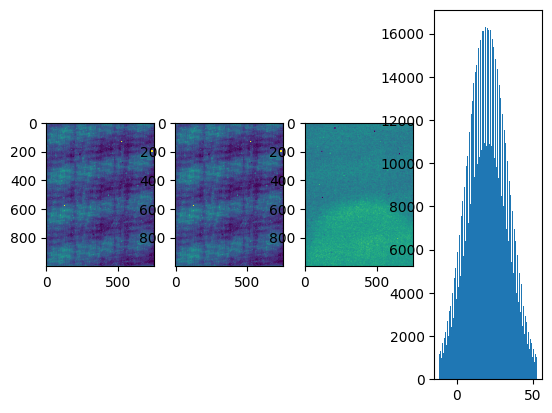

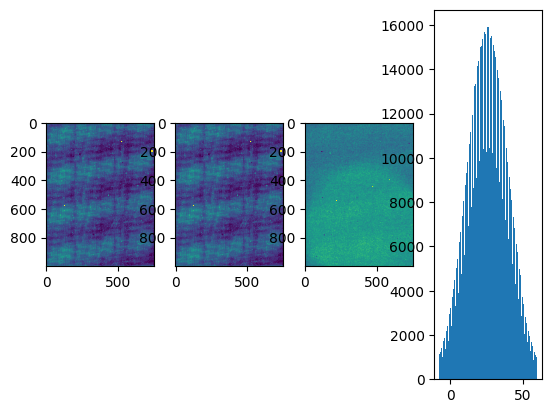

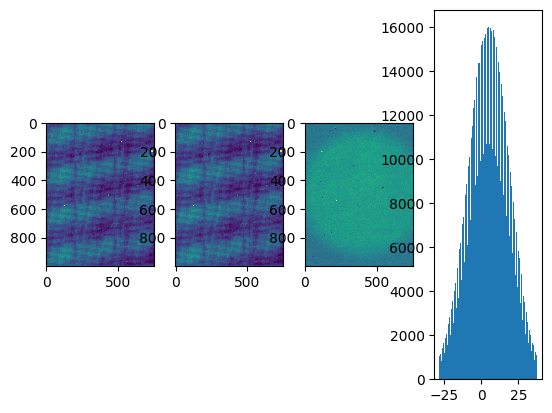

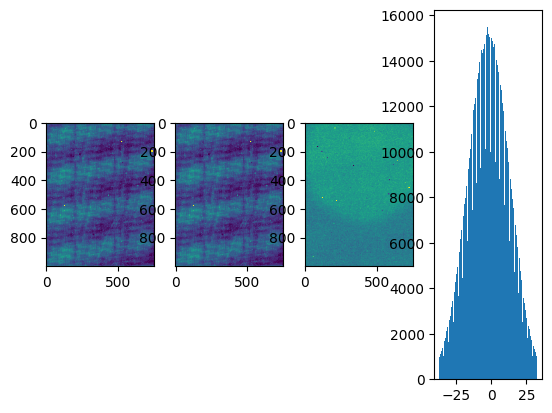

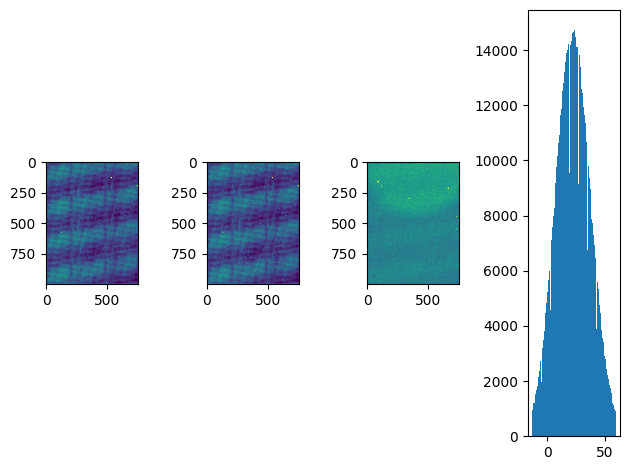

In [27]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

area of subsection in micrometers squared: 490000.0 um2
Radius of laser footprint in micrometers: 350.0 um
Area of laser footprint in micrometers squared: 384845.10006474965 um2
power per pixel: 2.5984480504799238e-06 mW / um2


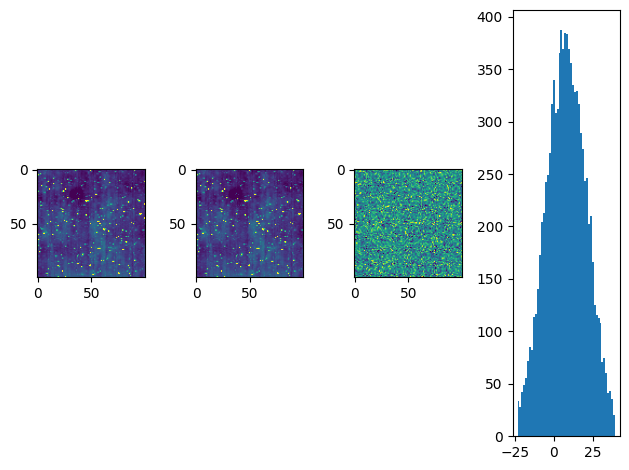

In [12]:
#select your image of focus (0 = first image, 1 = second image, etc)
i = 2

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 200 #top limit - slicing
b = 800 #bottom limit -slicing

l = 200 #left limit - slicing
r = 600 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = math.pi * ((radius_footprint) **2)
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
print(f'power per pixel: {power_per_pixel}')


dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [13]:
sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
intensity_ratio = solar_constant / sun_sim_intensity
print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = np.median(dark_subtract) * u.DN
print(light_leak)

#Input exposure time
exposure_time = 20 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (100* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

leak_rate * intensity_ratio

power per area of incident solar sim light on photodiode: 1.8067807418429163e-06 uW / um2
sum of all dark subtract: 80479.75 DN


NameError: name 'band_gap' is not defined

In [35]:
#simulating the sun as a replacement to the laser
incident_signal = sun_sim_intensity.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

44562490.43491145 ph / s
1.513746573541006e-09


In [13]:
#working out the math on some numbers from Tom Woods
incident_signal * intensity_ratio * np.pi*(22*u.micron)**2/pixel_size**2

<Quantity 6.61446931e+12 ph / s>

In [68]:
#INPUT PATH BELOW

angle_sweep = pathlib.Path.home() / '/Users/arhulber/Library/CloudStorage/OneDrive-NASA/post_beamline_vis_testing/2024_178_16_32_25/decoded/csv'

In [69]:


def process_vis_light_angle_sweep(image_paths, num_imgs, imgs_per):
    darks = []
    lights = []

    images = list(image_paths.glob('*BIN*.csv'))
    first_img = np.genfromtxt(images[0], delimiter=',')


    for i in range(num_imgs):


            pattern = '*BIN_'+'{:03d}'.format(i) + '.csv'
            img = image_paths.glob(pattern=pattern)
            imgs = [np.genfromtxt(file,delimiter=',') for file in img]
            if len(imgs) == 0:
                nan_array = np.empty_like(first_img)
                nan_array[:] = np.nan
                imgs = [nan_array,]


            if 0 <= i % (2*imgs_per) <= imgs_per-1:
                print('dark',i)
                darks.append(imgs)
            else:
                print('light',i)
                lights.append(imgs)

    return np.array(darks), np.array(lights)

def img_statistics(images, num_positions,imgs_per):
    for j in range(num_positions):
        vmax = np.percentile(images[imgs_per * j], 99)
        vmin = np.percentile(images[imgs_per * j], 1)


        fig, ax = plt.subplots(2,imgs_per)
        ax = ax.flatten()
        for i in range(imgs_per):
            ax[i].imshow(images[imgs_per * j + i], vmin=vmin, vmax=vmax)

    
            hist_kwargs = dict(range=(vmin, vmax), bins=100)
            ax[i + imgs_per].hist(images[imgs_per * j + i].flatten(), **hist_kwargs)



In [70]:
num_positions = 1
imgs_per = 1
num_images = 3


darks, lights = process_vis_light_angle_sweep(angle_sweep,num_images,imgs_per)
darks = darks[:, 0, ...]
lights = lights[:, 0, ...]

print(darks.shape)

dark 0
light 1
dark 2
(2, 250, 188)


In [71]:
mean_darks = []
for i in range(num_positions+1):
    # mean_darks.append(np.nanmean(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_darks.append(np.median(darks[i*imgs_per:imgs_per*(i+1)], axis=0))
    
mean_lights = []
for i in range(num_positions):
    # mean_lights.append(np.nanmean(lights[i*imgs_per:imgs_per*(i+1)], axis=0))
    mean_lights.append(np.median(lights[i*imgs_per:imgs_per*(i+1)], axis=0))

mean_lights = np.array(mean_lights)

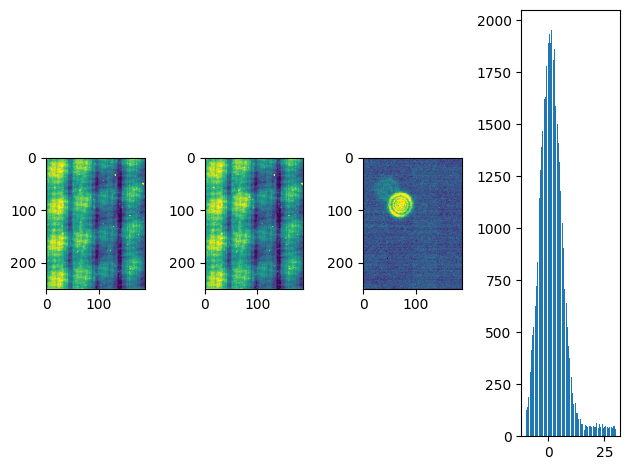

In [72]:
avg_darks = []
dark_subtracted_imgs = []
for i in range(num_positions):

    avg_dark = (mean_darks[i] + mean_darks[i+1]) / 2
    dark_subtract = mean_lights[i] - avg_dark
    
    avg_darks.append(avg_dark)
    dark_subtracted_imgs.append(dark_subtract)
    
         
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(avg_dark, vmin=np.percentile(avg_dark,1),  vmax=np.percentile(avg_dark,99))
    ax[1].imshow(mean_lights[i], vmin=np.percentile(mean_lights[i],1),  vmax=np.percentile(mean_lights[i],99))
    
    vmin = np.percentile(dark_subtract, 1)
    vmax = np.percentile(dark_subtract, 99)
    hist_kwargs = dict(range=(vmin, vmax), bins=100)
    ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
    ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
    
avg_darks = np.array(avg_darks)
dark_subtracted_imgs = np.array(dark_subtracted_imgs)

fig.tight_layout() #this separates the images to be more readable

area of subsection in micrometers squared: 115150.0 um2
Radius of laser footprint in micrometers: 164.5 um
Area of laser footprint in micrometers squared: 85012.2826043032 um2
power per pixel: 1.1763006113535192e-05 mW / um2


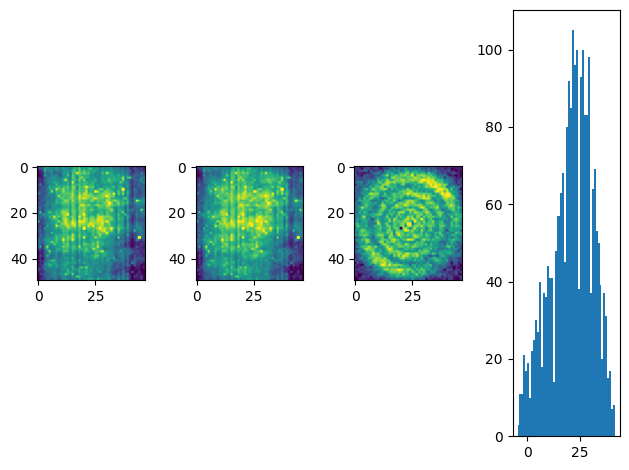

In [73]:
#select your image of focus (0 = first image, 1 = second image, etc)
i = 0

#This slices your images to focus in on certain areas in the plots
#Format: sl = (image position, vertical pixel slice (top to bottom), horizontal pixel slice (left to right)

t = 65 #top limit - slicing
b = 115 #bottom limit -slicing

l = 47 #left limit - slicing
r = 94 #right limit - slicing

sl = (i,slice(t,b),slice(l,r))

area_subsection = ((b - t) * (7*u.um))   *   ((r - l) * (7*u.um))
print(f'area of subsection in micrometers squared: {area_subsection}')

radius_footprint = ((r - l) / 2) * (7 *u.um)
print(f'Radius of laser footprint in micrometers: {radius_footprint}')

laser_footprint_area = math.pi * ((radius_footprint) **2)
print(f'Area of laser footprint in micrometers squared: {laser_footprint_area}')

power_per_pixel = ((1 * u.mW) / (laser_footprint_area))
print(f'power per pixel: {power_per_pixel}')


dark = avg_darks[sl]
light = mean_lights[sl]
dark_subtract = dark_subtracted_imgs[sl]

fig, ax = plt.subplots(1,4)
ax[0].imshow(dark, vmin=np.percentile(dark,1),  vmax=np.percentile(dark,99))
ax[1].imshow(light, vmin=np.percentile(light,1),  vmax=np.percentile(light,99))

vmin = np.percentile(dark_subtract, 1)
vmax = np.percentile(dark_subtract, 99)
hist_kwargs = dict(range=(vmin, vmax), bins=50)
ax[2].imshow(dark_subtract, vmin=vmin, vmax=vmax)
ax[3].hist(dark_subtract.flatten(), **hist_kwargs)
fig.tight_layout()

In [77]:
sun_sim_intensity = 170 * u.microwatt / (9.7 * u.mm) ** 2  #active aperture of thorlabs photodiode
solar_constant = 1.361 * u.kilowatt / u.m ** 2

sun_sim_intensity = sun_sim_intensity.to(u.kilowatt / u.m ** 2)
intensity_ratio = solar_constant / sun_sim_intensity
print(intensity_ratio)

#manually input visual mean to get data that doesn't consider the dark counts in the mean calculation, or use light_leak = np.median(dark_subtract) * u.DN
light_leak = 24 * u.DN
print(light_leak)

#Input exposure time
exposure_time = 5 * u.s

pixel_size = 7 * u.micron

#input wavelength here
energy_photon = (1240 * u.eV * u.nm) / (635* u.nm) / u.photon
print(energy_photon)

band_gap = 3.65 * u.eV / u.electron
gain = 1.8 * u.DN / u.electron

dn_photon = energy_photon / band_gap * gain
print(dn_photon)

leak_rate = light_leak / exposure_time / dn_photon
print(leak_rate)

leak_rate * intensity_ratio

753.2734705882352
24.0 DN
1.952755905511811 eV / ph
0.9630029123071945 DN / ph
4.984408602150538 ph / s


<Quantity 3754.62276657 ph / s>

In [78]:
#simulating the sun as a replacement to the laser
incident_signal = sun_sim_intensity.to(u.eV / u.m**2 / u.s)/energy_photon*pixel_size**2
incident_signal = incident_signal.to(u.photon / u.s)
print(incident_signal)

suppression = leak_rate/incident_signal
print(suppression)

282971814.26168776 ph / s
1.7614505583022615e-08


In [79]:
#working out the math on some numbers from Tom Woods
incident_signal * intensity_ratio * np.pi*(22*u.micron)**2/pixel_size**2

<Quantity 6.61446931e+12 ph / s>